## AR
AR 的英文全称叫做 Auto Regressive，中文叫自回归模型。这个算法的思想比较简单，它认为过去若干时刻的点通过线性组合，再加上白噪声就可以预测未来某个时刻的点。

在日常生活环境中就存在白噪声，在数据挖掘的过程中，你可以把它理解为一个期望为 0，方差为常数的纯随机过程。AR 模型还存在一个阶数，称为 AR（p）模型，也叫作 p 阶自回归模型。它指的是通过这个时刻点的前 p 个点，通过线性组合再加上白噪声来预测当前时刻点的值。


## MA
MA 的英文全称叫做 Moving Average，中文叫做滑动平均模型。它与 AR 模型大同小异，AR 模型是历史时序值的线性组合，MA 是通过历史白噪声进行线性组合来影响当前时刻点。

AR 模型中的历史白噪声是通过影响历史时序值，从而间接影响到当前时刻点的预测值。同样 MA 模型也存在一个阶数，称为 MA(q) 模型，也叫作 q 阶移动平均模型。我们能看到 AR 和 MA 模型都存在阶数，在 AR 模型中，我们用 p 表示，在 MA 模型中我们用 q 表示，这两个模型大同小异，与 AR 模型不同的是 MA 模型是历史白噪声的线性组合。

## ARIMA

ARIMA 的英文全称是 Auto Regressive Integrated Moving Average 模型，中文叫差分自回归滑动平均模型，也叫求合自回归滑动平均模型。相比于 ARMA，ARIMA 多了一个差分的过程，作用是对不平稳数据进行差分平稳，在差分平稳后再进行建模。ARIMA 的原理和 ARMA 模型一样。相比于 ARMA(p,q) 的两个阶数，ARIMA 是一个三元组的阶数 (p,d,q)，称为 ARIMA(p,d,q) 模型。其中 d 是差分阶数。

## ARMA

ARMA 的英文全称是 Auto Regressive Moving Average，中文叫做自回归滑动平均模型，也就是 AR 模型和 MA 模型的混合。

相比 AR 模型和 MA 模型，它有更准确的估计。同样 ARMA 模型存在 p 和 q 两个阶数，称为 ARMA(p,q) 模型。

## 参数

ARMA(endog,order,exog=None) 创建 ARMA 类：

endog：英文是 endogenous variable，代表内生变量，又叫非政策性变量，它是由模型决定的，不被政策左右，可以说是我们想要分析的变量，或者说是我们这次项目中需要用到的变量。

order：代表是 p 和 q 的值，也就是 ARMA 中的阶数。

exog：英文是 exogenous variables，代表外生变量。外生变量和内生变量一样是经济模型中的两个重要变量。相对于内生变量而言，外生变量又称作为政策性变量，在经济机制内受外部因素的影响，不是我们模型要研究的变量。

举个例子，如果想要创建 ARMA(7,0) 模型，可以写成：ARMA(data,(7,0))，其中 data 是我们想要观察的变量，(7,0) 代表 (p,q) 的阶数。

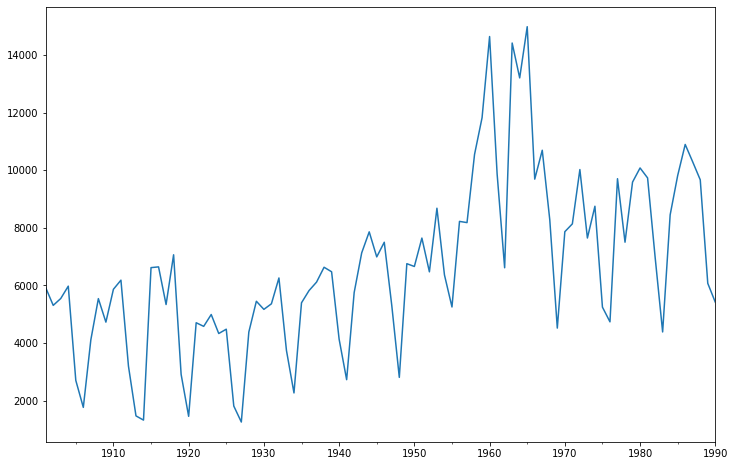

AIC: 1619.6323


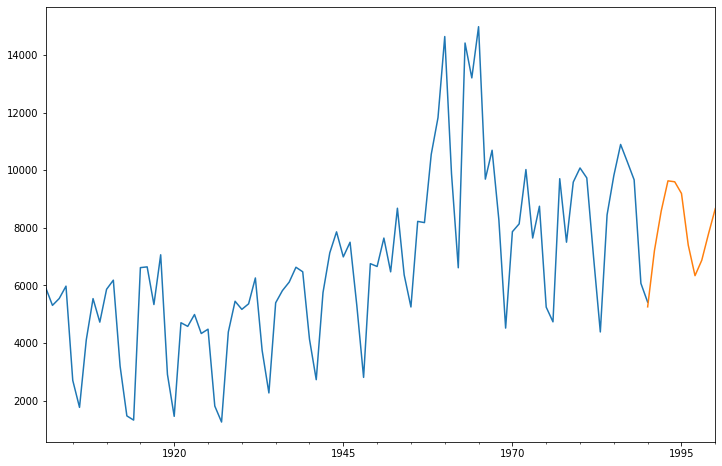

In [5]:
#----------------------------------------------DEMO------------------------------------------------#

# coding:utf-8
# 用ARMA进行时间序列预测
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.graphics.api import qqplot
import warnings
warnings.filterwarnings("ignore")
# 创建数据
data = [5922, 5308, 5546, 5975, 2704, 1767, 4111, 5542, 4726, 5866, 6183, 3199, 1471, 1325, 
        6618, 6644, 5337, 7064, 2912, 1456, 4705, 4579, 4990, 4331, 4481, 1813, 1258, 4383, 
        5451, 5169, 5362, 6259, 3743, 2268, 5397, 5821, 6115, 6631, 6474, 4134, 2728, 5753, 
        7130, 7860, 6991, 7499, 5301, 2808, 6755, 6658, 7644, 6472, 8680, 6366, 5252, 8223, 
        8181, 10548, 11823, 14640, 9873, 6613, 14415, 13204, 14982, 9690, 10693, 8276, 4519, 
        7865, 8137, 10022, 7646, 8749, 5246, 4736, 9705, 7501, 9587, 10078, 9732, 6986, 4385, 
        8451, 9815, 10894, 10287, 9666, 6072, 5418]
data=pd.Series(data)
data_index = sm.tsa.datetools.dates_from_range('1901','1990')
# 绘制数据图
data.index = pd.Index(data_index)
data.plot(figsize=(12, 8))
plt.show()

# 创建ARMA模型# 创建ARMA模型
arma = ARMA(data,(7,0)).fit()
print('AIC: %0.4lf' %arma.aic)
# 模型预测
y_predict = arma.predict('1990', '2000')
# 预测结果绘制
fig, ax = plt.subplots(figsize=(12, 8))
ax = data.ix['1901':].plot(ax=ax)
y_predict.plot(ax=ax)
plt.show()

## 对比特币走势进行预测

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA
import warnings
from itertools import product
from datetime import datetime
warnings.filterwarnings('ignore')

In [72]:
data = pd.read_csv('/Users/zhangqihao/Desktop/PYTHON/机器学习/比特币/bitcoin_2012-01-01_to_2018-10-31.csv')

# 将时间作为df的索引
data.Timestamp = pd.to_datetime(data.Timestamp)
data.index = data.Timestamp
# 数据探索
print(data.tail())

            Timestamp         Open         High          Low        Close  \
Timestamp                                                                   
2018-10-27 2018-10-27  6406.139739  6406.760647  6405.694040  6406.250125   
2018-10-28 2018-10-28  6402.247827  6402.645686  6401.900904  6402.322401   
2018-10-29 2018-10-29  6325.301912  6326.543333  6323.990182  6325.243847   
2018-10-30 2018-10-30  6264.149740  6264.974555  6263.354524  6264.282793   
2018-10-31 2018-10-31  6277.847370  6278.770948  6276.953752  6277.983404   

            Volume_(BTC)  Volume_(Currency)  Weighted_Price  
Timestamp                                                    
2018-10-27      0.929152        5951.054930     6406.251029  
2018-10-28      0.872451        5585.740434     6402.290680  
2018-10-29      4.100175       25824.917940     6325.211437  
2018-10-30      1.985505       12435.244960     6264.195689  
2018-10-31      4.066416       25538.928660     6277.879062  


In [56]:
# 按照月，季度，年来统计
# 只有当按照时间进行索引之后，才可以使用resample()函数

data_month = data.resample('M').mean()
data_quarter = data.resample('Q-DEC').mean()
data_year = data.resample('A-DEC').mean()

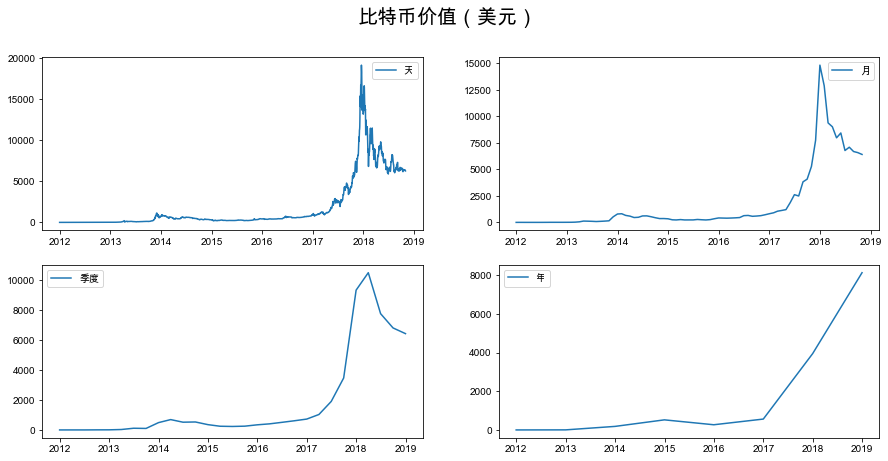

In [57]:
# 按照天，月，季度，年来显示比特币的走势
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
fig = plt.figure(figsize=[15, 7])


plt.suptitle('比特币价值（美元）', fontsize=20)

plt.subplot(221)
plt.plot(data.Weighted_Price, '-', label='天')
plt.legend()

plt.subplot(222)
plt.plot(data_month.Weighted_Price, '-', label='月')
plt.legend()

plt.subplot(223)
plt.plot(data_quarter.Weighted_Price, '-', label='季度')
plt.legend()

plt.subplot(224)
plt.plot(data_year.Weighted_Price, '-', label='年')
plt.legend()

plt.show()

In [58]:
# ARMA

# 设置参数范围
p = range(0, 3)
q = range(0, 3)

# product()返回p和q中的元素组成的笛卡尔积的元组
parameters = product(p, q)

parameters_list = list(parameters)

In [59]:
# 寻找最优ARMA模型参数，即 best_aic 最小

results = []
best_aic = float("inf") 

for param in parameters_list:
    try:
        model = ARMA(df_month.Weighted_Price,order=(param[0], param[1])).fit()
    except ValueError:
        print('参数错误:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])
    
# 输出最优模型
print('最优模型: ', best_model.summary())

参数错误: (0, 2)
最优模型:                                ARMA Model Results                              
Dep. Variable:         Weighted_Price   No. Observations:                   83
Model:                     ARMA(1, 1)   Log Likelihood                -688.761
Method:                       css-mle   S.D. of innovations            957.764
Date:                Thu, 27 Aug 2020   AIC                           1385.522
Time:                        18:29:49   BIC                           1395.198
Sample:                    12-31-2011   HQIC                          1389.409
                         - 10-31-2018                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2099.7277   1567.060      1.340      0.184    -971.654    5171.109
ar.L1.Weighted_Price     0.9251      0.042     22.043      0.000       0.843     

In [62]:
# 比特币预测

data_month2 = data_month[['Weighted_Price']]

# 为未来八个月的预测创建时间轴
date_list = [datetime(2018, 11, 30), datetime(2018, 12, 31), 
             datetime(2019, 1, 31), datetime(2019, 2, 28), 
             datetime(2019, 3, 31), datetime(2019, 4, 30), 
             datetime(2019, 5, 31), datetime(2019, 6, 30)]

future = pd.DataFrame(index=date_list, columns=data_month.columns)
data_month2 = pd.concat([df_month2, future])
data_month2['forecast'] = best_model.predict(start=0, end=91)

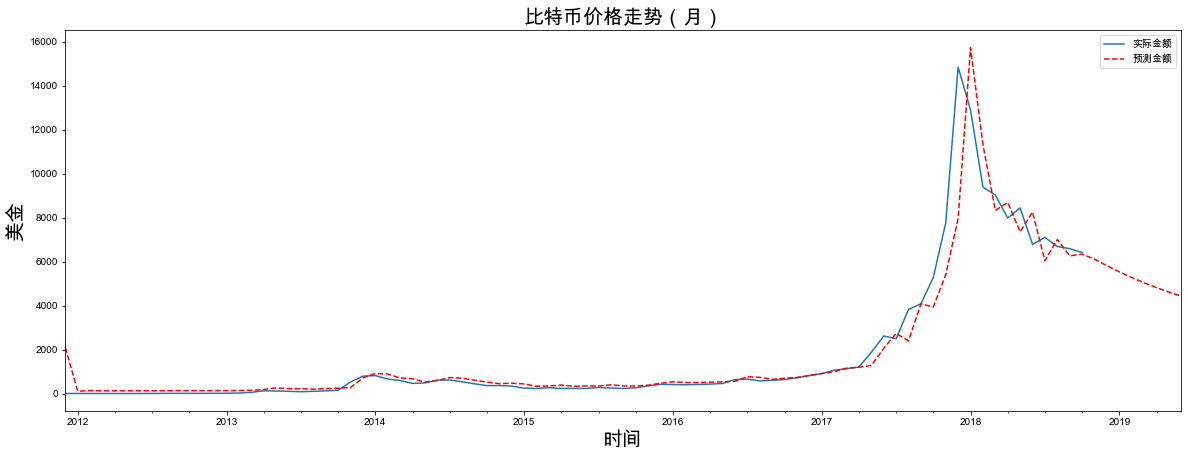

In [70]:
# 比特币预测结果显示
plt.figure(figsize=(20,7))

data_month2.Weighted_Price.plot(label='实际金额')
data_month2.forecast.plot(color='r', ls='--', label='预测金额')
plt.legend()
plt.title('比特币价格走势（月）',fontsize = 20)
plt.xlabel('时间', fontsize = 20)
plt.ylabel('美金',fontsize = 20)
plt.show()